In [ ]:
import pandas as pd

#selecione somente os imóveis classificados com tipo 'Apartamento'
dados = pd.read_csv('aluguel.csv', sep=';')
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao]
n1

In [ ]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao]
n2

In [ ]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites 
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
n3 = dados[selecao] 
n3

In [ ]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000.0)
n4 = dados[selecao]
n4

In [ ]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos.sort_values(by=['Idade'], inplace=True)
alunos
alunos[:3]


In [ ]:
import pandas as pd

dados = pd.read_csv('aluguel.csv', sep=';')
dados.fillna({'Condominio': 0, 'IPTU': 0}, inplace=True)
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados['Valor m2'] = (dados['Valor'] / dados['Area']).round(2)
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)

casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

dados_aux = pd.DataFrame(dados[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])

del dados_aux['Valor Bruto']

dados_aux.pop('Valor Bruto m2')

dados.drop(['Valor Bruto', 'Valor Bruto m2'], axis=1, inplace=True)
dados

bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
grupo_bairro = dados.groupby('Bairro')

for bairro, dados in grupo_bairro:
    display(dados)

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


dados = pd.read_csv('aluguel_amostra.csv', sep=';')
valor_m2 = dados['Valor m2'] 

Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print(Q1,
Q3,
IIQ,
limite_inferior,
limite_superior)

In [ ]:
import pandas as pd

dados = pd.read_csv('aluguel.csv', sep=';')

classes = [0,2,4,6,100]

labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados.Quartos, classes, labels=labels)
pd.value_counts(quartos)

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize(14,6))

In [ ]:


dados[dados['Valor']>=500000].sort_values(by=['Valor'])

valor = dados['Valor']

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]
dados_new.boxplot(['Valor'], by='Tipo')


In [ ]:
dados = pd.read_csv('aluguel_amostra.csv', sep=';')

grupo_tipo=dados.groupby('Tipo')['Valor']
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor']>=limite_inferior[tipo]) & (dados['Valor']<=limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
dados_new.boxplot(['Valor'], by=['Tipo'])


Text(0.5, 1.0, 'Total de Imóveis por Tipo')

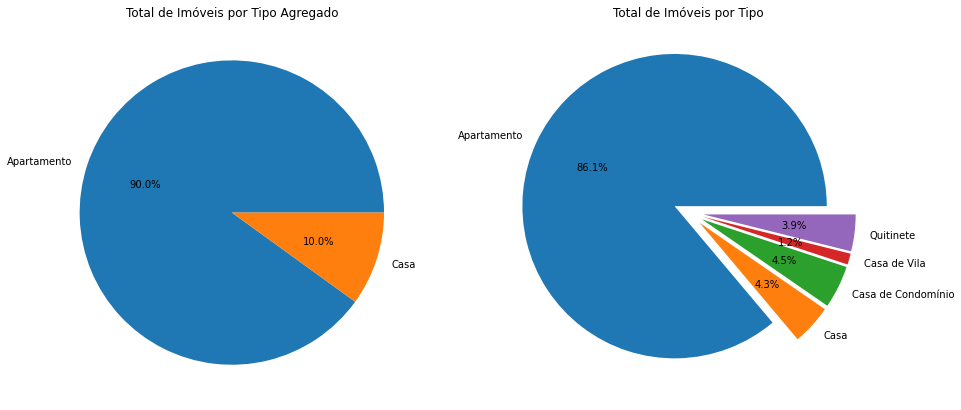

In [173]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('aluguel_amostra.csv', sep = ';')

area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')
